In [1]:
import numpy as np
import re
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image

In [2]:
def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result


In [4]:
# 저장한 리뷰 정보 불러오기
# df = pd.read_csv('./review_dataset.csv', encoding = 'utf-8-sig')
df = pd.read_csv('./appstore_634598719.csv')
df.head()

,USER,DATE,STAR,LIKE,TITLE,REVIEW
0,Vincent213,2022-10-27 21:55:04-07:00,2,0,로그인이 안되요 ㅜㅜㅜ,안드로이드로는 잘 썼는데 아이폰에서 안되네요 ㅜㅜ
1,아오여냐캬캥ㅇ,2022-10-17 03:23:05-07:00,5,0,정말의지박약인 저를 이끄는 앱,다이어트에 심리가 적용되는게 어떤건지 알게되고있어요 의지박약인데 정말 꾸준히 식단기...
2,✨Emilia,2022-10-06 22:04:44-07:00,5,0,사용하기 쉬워요,무료로도 사용할만한 기능들이 있어서 나쁘지 않아요\n지금은 유료 결제로 돌려서 코칭...
3,S_jei,2022-10-02 23:08:59-07:00,4,0,피드백이 빨라요.,임신성 당뇨로 대학병원에서 안내받아 사용한지 2주 정도 되었어요. 편리한 부분도 있...
4,MinQu,2022-09-21 04:04:01-07:00,1,0,하다하다 업데이트로 날려먹는건 ...,업데이트하니까 오류나면서 동작도 안하네요\n하.. 그냥 이쯤에서 바이바이


<AxesSubplot:>

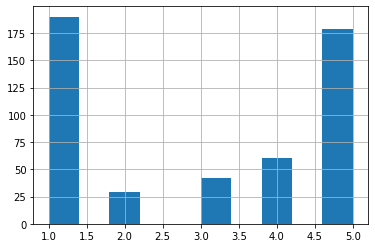

In [5]:
df['STAR'].hist()

In [6]:
okt = Okt()

df["nouns"] = df["REVIEW"].apply(okt.nouns)

In [7]:
df_set = df.copy()

In [8]:
df_set.head()

,USER,DATE,STAR,LIKE,TITLE,REVIEW,nouns
0,Vincent213,2022-10-27 21:55:04-07:00,2,0,로그인이 안되요 ㅜㅜㅜ,안드로이드로는 잘 썼는데 아이폰에서 안되네요 ㅜㅜ,"[안드로이드, 아이폰]"
1,아오여냐캬캥ㅇ,2022-10-17 03:23:05-07:00,5,0,정말의지박약인 저를 이끄는 앱,다이어트에 심리가 적용되는게 어떤건지 알게되고있어요 의지박약인데 정말 꾸준히 식단기...,"[다이어트, 심리, 적용, 건, 알, 의지, 박약, 정말, 식단, 기록, 체중, 기..."
2,✨Emilia,2022-10-06 22:04:44-07:00,5,0,사용하기 쉬워요,무료로도 사용할만한 기능들이 있어서 나쁘지 않아요\n지금은 유료 결제로 돌려서 코칭...,"[무료, 도, 사용, 기능, 지금, 유료, 결제, 코칭, 체중, 그래프, 화면, 목..."
3,S_jei,2022-10-02 23:08:59-07:00,4,0,피드백이 빨라요.,임신성 당뇨로 대학병원에서 안내받아 사용한지 2주 정도 되었어요. 편리한 부분도 있...,"[임신, 당뇨, 대학병원, 사용, 한지, 주, 정도, 부분, 부분, 매칭, 안, 소..."
4,MinQu,2022-09-21 04:04:01-07:00,1,0,하다하다 업데이트로 날려먹는건 ...,업데이트하니까 오류나면서 동작도 안하네요\n하.. 그냥 이쯤에서 바이바이,"[업데이트, 오류, 면서, 동작, 그냥, 이쯤, 바이바이]"


In [11]:
df_set['positive_yn'] = np.where(df_set['STAR'] >= 3, 1, 0)

In [12]:
df_set.head()

,USER,DATE,STAR,LIKE,TITLE,REVIEW,nouns,positive_yn
0,Vincent213,2022-10-27 21:55:04-07:00,2,0,로그인이 안되요 ㅜㅜㅜ,안드로이드로는 잘 썼는데 아이폰에서 안되네요 ㅜㅜ,"[안드로이드, 아이폰]",0
1,아오여냐캬캥ㅇ,2022-10-17 03:23:05-07:00,5,0,정말의지박약인 저를 이끄는 앱,다이어트에 심리가 적용되는게 어떤건지 알게되고있어요 의지박약인데 정말 꾸준히 식단기...,"[다이어트, 심리, 적용, 건, 알, 의지, 박약, 정말, 식단, 기록, 체중, 기...",1
2,✨Emilia,2022-10-06 22:04:44-07:00,5,0,사용하기 쉬워요,무료로도 사용할만한 기능들이 있어서 나쁘지 않아요\n지금은 유료 결제로 돌려서 코칭...,"[무료, 도, 사용, 기능, 지금, 유료, 결제, 코칭, 체중, 그래프, 화면, 목...",1
3,S_jei,2022-10-02 23:08:59-07:00,4,0,피드백이 빨라요.,임신성 당뇨로 대학병원에서 안내받아 사용한지 2주 정도 되었어요. 편리한 부분도 있...,"[임신, 당뇨, 대학병원, 사용, 한지, 주, 정도, 부분, 부분, 매칭, 안, 소...",1
4,MinQu,2022-09-21 04:04:01-07:00,1,0,하다하다 업데이트로 날려먹는건 ...,업데이트하니까 오류나면서 동작도 안하네요\n하.. 그냥 이쯤에서 바이바이,"[업데이트, 오류, 면서, 동작, 그냥, 이쯤, 바이바이]",0


In [13]:
positive_noun = df_set.loc[df_set['positive_yn']==1, 'nouns']
negative_noun = df_set.loc[df_set['positive_yn']==0, 'nouns']

In [14]:
import itertools

totwords_positive = list(itertools.chain(*positive_noun.to_list()))
totwords_negative = list(itertools.chain(*negative_noun.to_list()))

In [15]:
words_positive = [n for n in totwords_positive if len(totwords_positive) > 1] # 단어의 길이가 1개인 것은 제외
words_negative = [n for n in totwords_negative if len(totwords_negative) > 1] # 단어의 길이가 1개인 것은 제외

In [16]:
c_positive = Counter(words_positive) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
c_negative = Counter(words_negative) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

In [17]:
import os
FONT_PATH = os.environ.get("FONT_PATH", "/System/Library/Fonts/AppleSDGothicNeo.ttc")

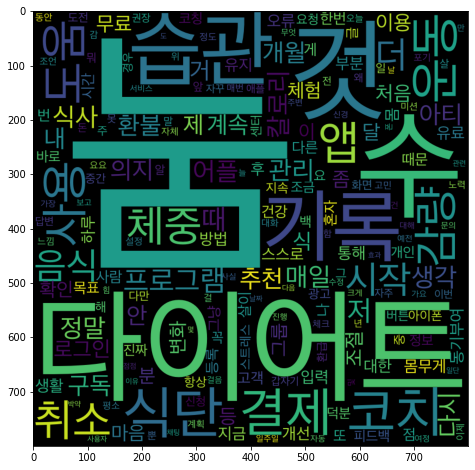

In [20]:
wc = WordCloud(font_path=FONT_PATH, width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c_positive)
# plt.figure()
plt.figure(figsize=(8,8))
plt.imshow(gen)

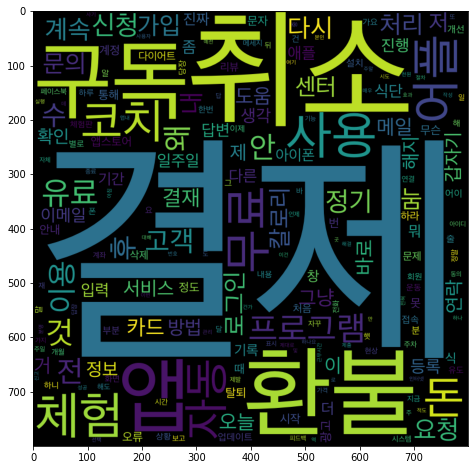

In [21]:
wc = WordCloud(font_path=FONT_PATH, width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c_negative)
# plt.figure()
plt.figure(figsize=(8,8))
plt.imshow(gen)

In [22]:
[x for x in df_set.loc[df_set['positive_yn']==0, 'nouns'] if '코치' in x]

[['코치', '연결', '확인'],
 ['코',
  '시국',
  '헬스장',
  '가기',
  '온라인',
  '피티',
  '알',
  '지금',
  '결재',
  '사용',
  '코치',
  '얘기',
  '수',
  '해결',
  '방법',
  '저번',
  '폭주',
  '다시',
  '이번',
  '꼭',
  '유지',
  '터'],
 ['눔', '코치', '환불', '지금', '현재'],
 ['앱내',
  '환불',
  '요청',
  '결제',
  '환불',
  '처리',
  '정기',
  '결제',
  '처리',
  '코치',
  '저',
  '근무시간',
  '피드백',
  '할하',
  '진정',
  '검',
  '저녁',
  '시간대',
  '아침',
  '시간대',
  '피드백',
  '하루',
  '두건',
  '정도',
  '무료',
  '체험',
  '게속',
  '햇',
  '관리',
  '느낌',
  '앱스토어',
  '내',
  '환불',
  '하라',
  '것',
  '여',
  '전',
  '서비스',
  '취소',
  '부탓'],
 ['원래',
  '눔',
  '코치',
  '다시',
  '처음',
  '생활',
  '습관',
  '교정',
  '프로그램',
  '광고',
  '창',
  '수가',
  '사용',
  '못',
  '표시',
  '보이지',
  '수',
  '방법'],
 ['프로그램',
  '내용',
  '심리',
  '접근',
  '스스로',
  '계획',
  '체크',
  '생각',
  '게',
  '매칭',
  '코치',
  '때',
  '쯤',
  '확인',
  '저',
  '개',
  '월동',
  '안',
  '효과',
  '보고',
  '대략',
  '정도',
  '유지',
  '중',
  '눔',
  '내용',
  '정말',
  '적극',
  '추천',
  '몇',
  '주',
  '전',
  '어플',
  '실행',
  '조금',
  '폰',
  '버벅거리',
  '현상',
  '일종',
 

In [23]:
df_set.loc[df_set['positive_yn']==1, :]

,USER,DATE,STAR,LIKE,TITLE,REVIEW,nouns,positive_yn
1,아오여냐캬캥ㅇ,2022-10-17 03:23:05-07:00,5,0,정말의지박약인 저를 이끄는 앱,다이어트에 심리가 적용되는게 어떤건지 알게되고있어요 의지박약인데 정말 꾸준히 식단기...,"[다이어트, 심리, 적용, 건, 알, 의지, 박약, 정말, 식단, 기록, 체중, 기...",1
2,✨Emilia,2022-10-06 22:04:44-07:00,5,0,사용하기 쉬워요,무료로도 사용할만한 기능들이 있어서 나쁘지 않아요\n지금은 유료 결제로 돌려서 코칭...,"[무료, 도, 사용, 기능, 지금, 유료, 결제, 코칭, 체중, 그래프, 화면, 목...",1
3,S_jei,2022-10-02 23:08:59-07:00,4,0,피드백이 빨라요.,임신성 당뇨로 대학병원에서 안내받아 사용한지 2주 정도 되었어요. 편리한 부분도 있...,"[임신, 당뇨, 대학병원, 사용, 한지, 주, 정도, 부분, 부분, 매칭, 안, 소...",1
5,충격이다진짜,2022-09-06 19:26:02-07:00,5,0,의지력 개선 및 지속성 관련하여 강추!,지금까지 3주 가량 눔과 함께 하였습니다. 일단 저는 운동도 있지만 식습관 개선(폭...,"[지금, 주, 가량, 눔, 일단, 저, 운동, 식, 습관, 개선, 폭, 시간, 간식...",1
6,w b l s,2022-09-05 06:57:08-07:00,4,0,나쁘지않아요,앱이 개발이 덜 된건지 오류가 좀 자주나긴 하는데 감수할만해서 크게 문제는 없어요 ...,"[앱, 개발, 덜, 오류, 좀, 자주, 감수, 만해, 크게, 문제, 코치, 로, 관...",1
...,...,...,...,...,...,...,...,...
494,-.--_,2020-06-23 19:13:23-07:00,4,0,저기..,전에 쓰다가 좋은거 같아서 다이어트 시작할때 다시 깔았는데 광고가 떠서 취소 버튼도...,"[전, 거, 다이어트, 시작, 때, 다시, 광고, 취소, 버튼, 세작, 못, 안, ...",1
496,노가다ㅋㅋㅋㅋ,2020-06-23 09:38:00-07:00,5,0,눔 만족합니다!!,"드라마틱한 변화는 아니지만, 생활습관이 조금씩 달라집니다. 매일 뭘 먹는지 기록하다...","[변화, 생활, 습관, 매일, 뭘, 기록, 더, 음식, 노력]",1
497,카카오택시 유저,2020-06-23 01:48:20-07:00,5,0,건강한 습관 만들기에 도움이 되어요~,"운동, 식습관, 마음챙김 등 건강한 습관 만드는데 도움이 되어요^^","[운동, 식, 습관, 마음, 등, 습관, 도움]",1
498,요키디키,2020-06-23 01:12:48-07:00,5,0,나도 모르게 살빠지는 앱,꾸준히 식단 기록하고 몸무게 체크하는 것만으로도 살이 빠져요. 코치님도 너무 친절하...,"[식단, 기록, 몸무게, 체크, 것, 살이, 코치, 힘, 나, 프로그램, 그룹, 원...",1


In [24]:
words_positive_cnt = pd.DataFrame(columns =['word'], data = words_positive)
words_negative_cnt = pd.DataFrame(columns =['word'], data = words_negative)

In [25]:
words_positive_cnt_norm = words_positive_cnt.value_counts(normalize=True).to_frame().reset_index()
words_negative_cnt_norm = words_negative_cnt.value_counts(normalize=True).to_frame().reset_index()

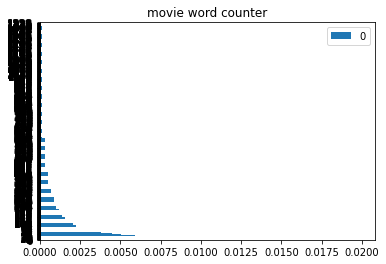

<Figure size 1440x1440 with 0 Axes>

In [26]:
# 빈도수 시각화하기
words_positive_cnt_norm.plot(kind='barh',title='movie word counter')
plt.figure(figsize=(20,20))
# # 내림차순 정렬
# words_positive_cnt_norm.sort_values().plot(kind='barh',title='movie word counter')
plt.show()

In [27]:
words_positive_cnt_norm = words_positive_cnt_norm.rename(columns = {0:'percentage'})
words_negative_cnt_norm = words_negative_cnt_norm.rename(columns = {0:'percentage'})

In [28]:
words_positive_cnt_norm.sort_values(by =['percentage'], ascending=False).head(10)

,word,percentage
0,눔,0.019785
1,다이어트,0.018917
2,수,0.018396
3,것,0.015620
4,습관,0.014752
5,기록,0.013711
6,식단,0.013363
7,코치,0.012496
8,결제,0.011454
9,운동,0.010934


In [29]:
words_negative_cnt_norm.sort_values(by =['percentage'], ascending=False).head(10)

,word,percentage
0,결제,0.047996
1,취소,0.027690
2,환불,0.021624
3,구독,0.018460
4,앱,0.016350
5,사용,0.013449
6,체험,0.012922
7,어플,0.012658
8,무료,0.012131
9,코치,0.010812


In [30]:
# [x for x in df_set.loc[df_set['positive_yn']==0, 'nouns'] if '코치' in x]
def get_coach_index(row):
    print(row)
    

In [31]:
df_set['coach_yn'] = df_set['nouns'].apply(lambda x : 1 if '코치' in x else 0)

In [34]:
# 코치가 존재하는 부정적인 답변 확인 
df_set[(df_set['coach_yn']==1)&(df_set['positive_yn']==0)].sort_values(by = ['DATE'])

,USER,DATE,STAR,LIKE,TITLE,REVIEW,nouns,positive_yn,coach_yn
455,hyeon_choi,2020-07-22 19:12:13-07:00,1,0,다이어트는 본인 의지,결국 본인 의지예요 의지박약이신 분들은 돈 버리지 말고 다른데 투자하세요 1:1 코...,"[본인, 의지, 의지, 박약, 분, 돈, 투자, 코치, 별로, 나, 신경, 안, 답...",0,1
441,Juliarobot,2020-07-31 16:18:00-07:00,1,0,구매자 모르게 자동결제 유도하는 사기업체,결제창에 ‘새로운 프로그램이 자동으로 시작됩니다.’라고 써있다며 자동결제에 동의했다...,"[결제, 창, 프로그램, 자동, 시작, 자동, 결제, 동의, 아치, 왜, 식, 돈,...",0,1
439,오구삼브로드웨이,2020-08-02 01:12:32-07:00,1,0,아마추어 1:1 코치입니다 ㅜ,전문적인 서비스인척 광고를 너무 많이해서 기대하고 가입했는데\n세상에나... 너무 ...,"[전문, 서비스, 인척, 광고, 해, 가입, 세상, 전문, 코치, 구글링, 먄, 정...",0,1
416,오룻,2020-08-20 23:17:37-07:00,1,0,눔,아주 불만족합니다\n어플만 있고 코치 해 주는 건 없고 이런 줄 모랐음\n돈 낭비함,"[아주, 불만족, 어플, 코치, 해, 건, 줄, 돈]",0,1
412,supsky11,2020-08-31 00:59:22-07:00,1,0,머니백 프로그램에 속지 마세요,사실 코치도 형식적인 응원 메세지만 보낼 뿐 질문을 해도 정해진 답변 하나 보내는 ...,"[사실, 코치, 형식, 응원, 메세지, 뿐, 질문, 해도, 정해진, 답변, 하나, ...",0,1
394,suunmmi,2020-09-08 02:07:15-07:00,1,0,오류,2주차인데 갑자기 그룹채팅은 없어지고\n개인 코치님한테도 메세지 보낼려고하면 오류라...,"[주차, 갑자기, 그룹채팅, 개인, 코치, 도, 메세지, 오류]",0,1
392,Lovelyggom,2020-09-08 07:07:25-07:00,2,0,코치나 기록이 너무 기계적이예요.,초기 사용방법을 알려주는게 섬세하지 않습니다.\n식사기록도 선택의 문제이지 현실적이...,"[초기, 사용, 방법, 식사, 기록, 선택, 문제, 현실, 그룹, 방, 동기부여, ...",0,1
340,Aklokkkbw,2020-10-29 18:29:44-07:00,1,0,별점 한개도 아까움,"SNS로 무료 체험만 크게 과장 광고하고\n7일 지나니 179,000원이 결제됨\n...","[로, 무료, 체험, 크게, 과장, 광고, 결제, 실제, 어플, 효과, 코치, 근무...",0,1
331,hyrwon0212,2020-11-09 02:06:01-07:00,1,0,뭐이런 개같은경우가 있죠?,구독을 하지도 않았는데\n왜 99.000원이 갑자기 결제가 됐죠?\n결제하겠단 소리...,"[구독, 왜, 갑자기, 결제, 결제, 소리, 코치, 어쩌, 전화, 뭐, 이, 상황]",0,1
330,이게모야모야,2020-11-09 05:09:42-07:00,1,0,별로..,도움 안됨\n3개월 13만원 결제한거 너무 돈 아깝고 \n코치라고 배정되봤자 별로 ...,"[도움, 개월, 결제, 거, 돈, 코치, 배정, 별로, 써쥬, 거, 돈, 움, 느낌...",0,1


In [33]:
df_set[(df_set['coach_yn']==1)&(df_set['positive_yn']==1)]

,USER,DATE,STAR,LIKE,TITLE,REVIEW,nouns,positive_yn,coach_yn
3,S_jei,2022-10-02 23:08:59-07:00,4,0,피드백이 빨라요.,임신성 당뇨로 대학병원에서 안내받아 사용한지 2주 정도 되었어요. 편리한 부분도 있...,"[임신, 당뇨, 대학병원, 사용, 한지, 주, 정도, 부분, 부분, 매칭, 안, 소...",1,1
5,충격이다진짜,2022-09-06 19:26:02-07:00,5,0,의지력 개선 및 지속성 관련하여 강추!,지금까지 3주 가량 눔과 함께 하였습니다. 일단 저는 운동도 있지만 식습관 개선(폭...,"[지금, 주, 가량, 눔, 일단, 저, 운동, 식, 습관, 개선, 폭, 시간, 간식...",1,1
6,w b l s,2022-09-05 06:57:08-07:00,4,0,나쁘지않아요,앱이 개발이 덜 된건지 오류가 좀 자주나긴 하는데 감수할만해서 크게 문제는 없어요 ...,"[앱, 개발, 덜, 오류, 좀, 자주, 감수, 만해, 크게, 문제, 코치, 로, 관...",1,1
8,이용자ㅇ튠허ㅓ,2022-08-15 18:44:54-07:00,3,0,보통입니다,저는 의지가 약한 편이라서 한 번 사용해보았는데 오히려 체중이 증가했어요 ㅋㅋㅋ 아...,"[저, 의지, 편이, 번, 사용, 오히려, 체중, 증가, 이용자, 피드백, 것, 저...",1,1
21,rinroninrin,2022-04-25 17:13:16-07:00,5,0,한달째 이용중입니다.,"인스타 광고로 처음 접해서 매번 속지만 속는 셈 치고 한번 해볼까, 하고 시작했는데...","[인스타, 광고, 처음, 접, 매번, 속지, 속, 셈, 한번, 시작, 시작, 여태,...",1,1
...,...,...,...,...,...,...,...,...,...
464,인어별,2020-07-19 02:55:17-07:00,5,0,습관 개선에 도움이 됩니다,"다이어트에 동기가 필요하여 6개월 프로그램 신청해서 진행해 보았는데요, 적절한 미션...","[다이어트, 동기, 개월, 프로그램, 신청, 진행, 미션, 강도, 동기, 부여, 식...",1,1
466,alswl1212,2020-07-14 23:49:44-07:00,5,9,아무것도 개선하지말고 이렇게 하세요. 이런 서비스는 없어져야 합니다,자동결제 전 구독취소 시도했으나 앱내결제가 아니어서 구독취소 버튼조차 안보였고 (이...,"[자동, 결제, 전, 구독, 취소, 시도, 앱, 결제, 구독, 취소, 버튼, 것, ...",1,1
475,오류짜증,2020-07-08 02:04:06-07:00,4,0,진짜빠져요,"다이어트약,주사 다해봤지만 돈만 엄청쓰고\n딱 그때뿐 바로 요요가 왔어요\n인스타에...","[다이어트, 약, 주사, 다해, 돈, 그때, 바로, 요요, 인스타, 광고, 보고, ...",1,1
492,JerryKim73,2020-06-24 08:38:08-07:00,5,0,눔,"다양한, 그리고 방대한 정보와 함께, 코치의 설명 염려 걱정등 일반적으로 다이어트시...","[정보, 코치, 설명, 염려, 걱정, 등, 일반, 다이어트, 시, 타인, 스트레스,...",1,1


In [36]:
df_set[(df_set['coach_yn']==1)].to_csv('./chk_review.csv', encoding = 'utf-8-sig') # csv 파일로 저장